# Nejkratší cesty - part 2

[Odkaz na slidy](https://rtime.ciirc.cvut.cz/~hanzalek/KO/SPT_e.pdf)

## Věta o existenci nejkratší cesty - dodatek
Z minula víme, že platí věta o existenci nejkratší cesty z s do t. Stejná věta ale neplatí pro sled, protože v případě cyklů záporné délky vždy najdeme kratší sled ve smyslu součtu cen hran.

## Trojúhelníková nerovnost pro nejkratší cesty
Úplně to stejný už bylo na přednášce z TAL, ale i tak

$$I(i, j)\leq(i,k)+I(k,j)$$

Důkaz je sporem. Byl taky na přednášce z TAL.

## Podmínka nezáporného cyklu

Tohle už opět padlo na TAL, ale ve zkratce, známé algoritmy, které dokáží najít nejkratší cestu v polynomiálním čase mají podmínku, že všechny cykly v grafu musí mít nezápornou délku (opět ve smyslu součtu cen).

## Hledání hamiltonovské kružnice
Tenhle problém je NP-úplný. Úkážeme to převodem na jinou NP-těžkou úlohu. Konkrétně, zkusíme převést problém hledání nejkratší cesty v obecném grafu na problém vyhledávání Hamiltonovské kružnice

**Pozn.:** NP-obtížné úlohy bývají optimalizační. NP-úplné jsou pak úlohy kde chceme o něčem rozhodnout. Aspoň tak jsem to teda pochopil.

V obou případech máme nějaký graf. V případě EHC hledáme cestu z vrcholu $v$ do vrcholu $v$. Zadefinujeme si pak graf, který je ekvivalentní s původním, nicméně pro vrchol $v$ vytvoříme i pak duplicitní vrchol $v'$. Potom všechny hrany označíme cenou -1 až na hrany z vrcholu $s$ a do vrcholu $t$ (vstupní a výstupní vrcholy).
Když nám pak algoritmus pro hledání nejkratší cesty najde řešení rovné $-|V(G)|$, pak se nám podařilo najít Hamiltonovskou kružnici. To zároveň znamená, že problém hledání nejkratší cesty (NP-obtížná úloha) se nám povedlo převést na EHC (NP-úplná úloha).

Protože je v tom pořád strašnej chaos, tady je link, kterej to vysvětluje vcelku dobře: https://stackoverflow.com/questions/1857244/what-are-the-differences-between-np-np-complete-and-np-hard

## Bellmanův princip optimality

Laicky: nejkratší cesta se skládá ze segmentů, které jsou zároveň nejkratšími cestami.

**Pozor!** Je to ale jenom implikace, ne ekvivalence. Neplatí totiž že složením dvou nejkratších cest vznikne nejkratší cesta.

Dokazuje se to sporem a bylo to zase dokázáný na přednášce z TAL. Celá formulace se nachází i na KO slidech.


# Shortest Path with Negative Cycle is NP-hard

Existence of a Hamiltonian cycle (cycle visiting every node exactly
once) in directed graph G is polynomial-time reducible to the Shortest
path problem:

- Create $G′$ as a weighted version of graph G with weights equal to $-1$.
- Create new $v′ ∈ G′$ as a duplicate of one arbitrary vertex $v ∈ G′$ including its edges.
- Create source vertex $s$, destination vertex $t$ and edges $(s, v)$ and $(v′, t)$ with weights equal to $0$.
- The length of the shortest path from $s$ to $t$ in $G′$ is equal to $-|V (G )|$ if and only if there is a Hamiltonian cycle in graph $G$.

Note: Every cycle in graph $G$ leads to a negative cycle in graph $G′$.

![image.png](../assets/image2.png)

Added vertex $S$ as as start and vertex $T$ as a target. And to make it Hamilton cycle, add $-1$ values.

## NP (non polynomial)

Musí platit:

1. úlohy jsou v NP,
2. všechny úlohy jsou na ně převeditelné.

## NP hard (obtížné)

Jsou převeditelné na NP.

# Bellman's Principle of Optimality

## Theorem - Bellman’s Principle of Optimality

Suppose we have digraph $G$ , weights $c : E (G ) → R$, no negative cycles.
Let $k ∈ N$, and let $s$ and $w$ be two vertices. Let $P^k$ be a shortest one
among all s-w-paths with at most $k$ edges, and let $e = (v , w )$ be its ﬁnal
edge. Then $P^{k−1}[s, v]$ (i.e. $P^k$ without the edge $e$) is a shortest one
among all s-v-paths with at most $k − 1$ edges.

# Dijkstra Algorithm [1959] - Nonnegative Weights

**Input**: digraph $G$ , weights $c : E (G ) → R+ 0$ and node $s ∈ V (G )$.

**Output**: Vectors $l$ and $p$. For $v ∈ V (G )$, $l(v )$ is the length of the shortest path from $s$ and $p(v )$ is the previous node in the path. If v is unreachable from $s$, $l(v ) = ∞$ and $p(v )$ is undeﬁned.

```
l(s) := 0; l(v ) := ∞ for v 6 = s; R := ;
while R 6 = V (G ) do
   Find v ∈ V (G ) \ R such that l(v ) = mini∈V (G )\R l(i);
   R := R ∪ {v } // in the first run we add vertex s
   // further calculate non-permanent value of l(w ) for
      every node on border of R
   for w ∈ V (G ) \ R such that (v , w ) ∈ E (G ) do
      if l(w ) > l(v ) + c(v , w ) then
         l(w ) := l(v ) + c(v , w ); p(w ) := v ;
      end
   end
end
```


## Dijkstrův algoritmus
Inicializujeme zdrojový vrchol na nulu, zbylé na nekonečno.
Dokud se nedostaneme do všech vrcholů vybereme vrchol který má minimální hodnotu a spočítáme nejkratší cestu do tohoto vrcholu. Váhy pro dostupné vrcholy se mohou zlepšovat (zjistíme, že prostřednictvím nově přidaného vektoru se nám cesta zkrátí). Vrchol přidáme do množiny když už jsme objevili všechny vrcholy ze kterých vede hrana do tohoto vrcholu.

Animace:

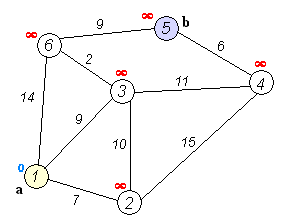



 ## Důkaz optimality Dijkstrova algoritmu

 Základní krok: pro množinu která obsahuje pouze počáteční vrchol je algoritmus optimální
 Indukční krok: po přidání vrcholu do množiny máme stále optimální řešení
 - Nejprve dokážeme pro předchůdce kteří se nacházejí v množině R
 - Poté dokážeme pro předchůdce kteří se nenacházejí v množině R

 ## Speciální případy řešitelné lineárně
 - Planární grafy (grafy ve kterých se hrany nekříží při projekci do 2D roviny)
 - Neorientované grafy s celočíselnými vahami
 - DAGy

 ## Zrychlení Dijkstry
 - Můžeme využít A* algoritmus, tedy zavedeme heuristiku, například ve 2D - eukleidovská vzdálenost ("vzdušnou čarou").
 - Oboustranný Dijkstra, to znamená vyhledávání z obou konců

 ## Oboustranné prohledávání (podrobněji)
 Pro jeden směr budeme muset otočit orientaci hran. Prohledáváme tedy dva prostory a algoritmus zastavíme když nejlepší vrchol který je součástí obou množin (ve smyslu součtu nejkratších cest) je lepší než nejlepší vrchol v prioritní frontě algoritmu.

 ## Příklad
 Máme Pětilitrovou lahev a třílitrovou lahev. Chceme naplnit pětilitrovou čtyřmi litry vody.
 Sekvence: (5,0) -> (2,3) -> (2,0) -> (0,2) -> (5,2) -> (4,3)
 Tuhle úlohu ale můžeme formulovat i grafem kde každá hrana reprezentuje nějaké přelití.
 Hrany grafu pak můžeme upravit v závislosti na tom co optimalizujeme. Třeba chceme minimalizovat množství vody které vylejeme.

 ## Další příklad
 Máme 4 lidi, most a pochodeň. Jednotlivým lidem trvá překročit most 1, 2, 5 a 9 minut. Pro překročení potřebují pochodeň a mohou jít maximálně dva naráz. Tohle můžeme formulovat také jako graf.

 ## Třetí příklad
 Máme komunikační síť definovanou jako orientovaný graf. Váha každé hrany nám popisuje pravděpodobnost doručení zprávy v tomto konkrétním komunikačním kanále.
 To znamená, že pravděpodobnost doručení zprávy po sekvenci hran je součin pravděpodobností.
 **Pozor!** pravděpodobnost nedoručení (dopňek do jedničky) už násobit nesmíme. Protože v takovém případě jde už o logický OR. V případě, že tedy máme zadanou tuto úlohu pomocí pravděpodobností nedoručení, musíme nejrpve udělat doplňky do jedničky a až potom násobit.

 Nojo, ale jak to napasovat na problém nejkratší cesty? Můžeme využít logaritmus, kterým převedeme násobení na sčítání. Cena každé hrany tedy pak bude záporně vzatý logaritmus pravděpodobnosti přenosu (záporně protože v původním problému maximalizujeme).

## Bellman-Ford algoritmus
Využívá myšlenky, že každá cesta v sobě bude mít maximálně $n-1$ vrcholů. Ve vnitřní smyčce iterujeme přes hrany a zjišťujeme jestli by hrana pomohla vylepšit již nalezené řešení. Pokud by se ve vnitřní smyčce už nic nezměnilo, můžeme zastavit i tu vnější. Jinak tu vnější zastavíme po $n-1$ iteracích.

Obrázek:

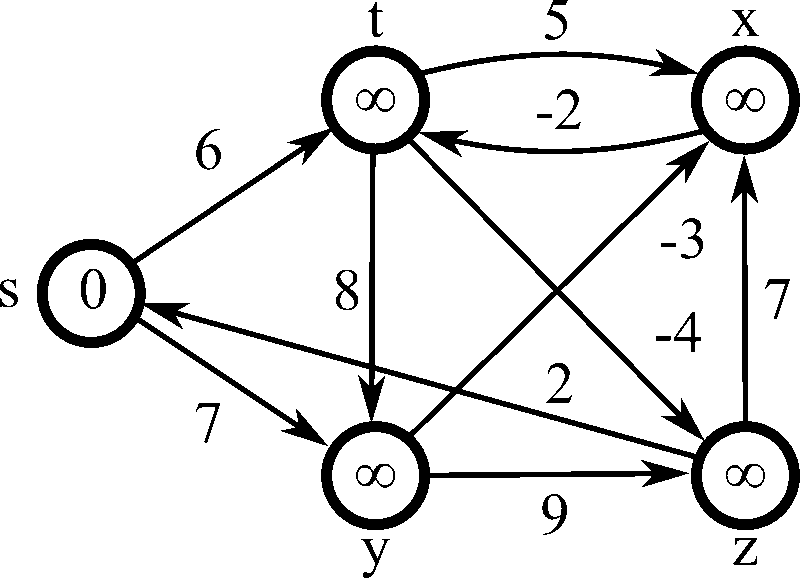

## Důkaz správnosti

Platí

$$I^l(w)\leq c(E(P^k))$$

, kde $I^k(w)$ je label pro hranu w po k iteracích, $c(E(P^k))$ je pak délka cesty $P^k$

Dokazujeme indukcí. Základní krok je takový, že při prvním kroku jsou všechny nalezené cesty určitě suboptimální nebo nejlépe stejně dobré (pro graf s jedním vrcholem).
Indukční krok je chaos, je to ve slidech.